# 香农熵

## 香农熵代码实现

In [58]:
import numpy as np
import pandas as pd

In [59]:
row_data = {'是否陪伴' :[0,0,0,1,1],
            '是否玩游戏':[1,1,0,1,1],
            '渣男' :['是','是','不是','不是','不是']}
dataSet = pd.DataFrame(row_data) 
dataSet

,是否陪伴,是否玩游戏,渣男
0,0,1,是
1,0,1,是
2,0,0,不是
3,1,1,不是
4,1,1,不是


In [60]:
def calEnt(dataSet):
    n = dataSet.shape[0] #拿到总行数
    iset = dataSet.iloc[:,-1].value_counts() #统计标签类别
    p = iset/n #得到每一类标签所占比
    ent = (-p*np.log2(p)).sum() #计算信息熵
    return ent
    
#计算全体数据的信息熵---根据标签列去进行计算的
calEnt(dataSet) 

0.9709505944546686

## 信息增益

In [61]:
dataSet.T

,0,1,2,3,4
是否陪伴,0,0,0,1,1
是否玩游戏,1,1,0,1,1
渣男,是,是,不是,不是,不是


计算第0列的信息增益：

In [62]:
a = (3/5)*(-(2/3)*np.log2(2/3)-(1/3)*np.log2(1/3))
calEnt(dataSet)-a

0.4199730940219749

计算第1列的信息增益：

In [63]:
b = (4/5)*(-(2/4)*np.log2(2/4)-(2/4)*np.log2(2/4))
calEnt(dataSet)-b

0.17095059445466854

## 划分数据集

In [65]:
# 定义信息熵
def calEnt(dataSet):
    n = dataSet.shape[0]                              # 数据集总行数
    iset = dataSet.iloc[:,-1].value_counts()          # 统计标签的所有类别
    p = iset/n                                        # 统计每一类标签所占比
    ent = (-p*np.log2(p)).sum()                       # 计算信息熵
    return ent

# 选择最优的列进行切分
def bestSplit(dataSet):
    baseEnt = calEnt(dataSet)                                # 计算原始熵
    bestGain = 0                                             # 初始化信息增益
    axis = -1                                                # 初始化最佳切分列，标签列
    
    for i in range(dataSet.shape[1]-1):                      # 对特征的每一列进行循环
        levels= dataSet.iloc[:,i].value_counts().index       # 提取出当前列的所有取值
        ents = 0                                             # 初始化子节点的信息熵
        
        for j in levels:                                     # 对当前列的每一个取值进行循环
            childSet = dataSet[dataSet.iloc[:,i]==j]         # 某一个子节点的dataframe
            ent = calEnt(childSet)                           # 计算某一个子节点的信息熵
            ents += (childSet.shape[0]/dataSet.shape[0])*ent # 计算当前列的信息熵
        print('第{}列的信息熵为{}'.format(i,ents))
            
        infoGain = baseEnt-ents                              # 计算当前列的信息增益
        print('第{}列的信息增益为{}\n'.format(i,infoGain))
        
        if (infoGain > bestGain):
            bestGain = infoGain                              # 选择最大信息增益
            axis = i                                         # 最大信息增益所在列的索引
    print("第{}列为最优切分列".format(axis))
    return axis

In [66]:
bestSplit(dataSet)

第0列的信息熵为0.5509775004326937
第0列的信息增益为0.4199730940219749

第1列的信息熵为0.8
第1列的信息增益为0.17095059445466854

第0列为最优切分列


0

## 按照给定列切分数据集

In [70]:
#为决策树进一步划分去做准备
def mySplit(dataSet,axis,value):
    col = dataSet.columns[axis]
    redataSet = dataSet.loc[dataSet[col]==value,:].drop(col,axis=1)
    return redataSet

In [71]:
dataSet

,是否陪伴,是否玩游戏,渣男
0,0,1,是
1,0,1,是
2,0,0,不是
3,1,1,不是
4,1,1,不是


In [68]:
#验证函数：以axis=0，value=1为例
mySplit(dataSet,0,1)

,是否玩游戏,渣男
3,1,不是
4,1,不是


## ID3算法

In [72]:
"""
函数功能：基于最大信息增益切分数据集，递归构建决策树
参数说明：
dataSet：原始数据集(最有一列是标签)
return：myTree：字典形式的树
"""
def createTree(dataSet):
    featlist = list(dataSet.columns)                        # 提取出数据集所有的列
    classlist = dataSet.iloc[:,-1].value_counts()           # 获取最后一列类标签
    
    # 判断最多标签数目是否等于数据集行数，或者数据集是否只有一列
    if classlist[0]==dataSet.shape[0] or dataSet.shape[1] == 1:
        return classlist.index[0]                           # 如果是，返回类标签
   
    axis = bestSplit(dataSet)                               # 确定出当前最佳切分列的索引
    bestfeat = featlist[axis]                               # 获取该索引对应的特征
    myTree = {bestfeat:{}}                                  # 采用字典嵌套的方式存储树信息
    del featlist[axis]                                      # 删除当前特征
    valuelist = set(dataSet.iloc[:,axis])                   # 提取最佳切分列所有属性值
    
    for value in valuelist:                                 # 对每一个属性值递归建树
        myTree[bestfeat][value] = createTree(mySplit(dataSet,axis,value))
    
    return myTree

In [73]:
dataSet

,是否陪伴,是否玩游戏,渣男
0,0,1,是
1,0,1,是
2,0,0,不是
3,1,1,不是
4,1,1,不是


In [74]:
createTree(dataSet)

第0列的信息熵为0.5509775004326937
第0列的信息增益为0.4199730940219749

第1列的信息熵为0.8
第1列的信息增益为0.17095059445466854

第0列为最优切分列
第0列的信息熵为0.0
第0列的信息增益为0.9182958340544896

第0列为最优切分列


{'是否陪伴': {0: {'是否玩游戏': {0: '不是', 1: '是'}}, 1: '不是'}}

# sklearn 实现决策树分类

## 导入相关包

In [1]:
# 导入需要的算法库和模块
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

plt.rcParams['font.sans-serif']=['Simhei']
plt.rcParams['axes.unicode_minus']=False

## 探索数据

In [22]:
wine = load_wine()

wine.data.shape #特征X
wine.target  #标签y
wine.feature_names
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [9]:
#合成数据
data =np.concatenate((wine.data,wine.target.reshape(-1,1)),axis=1)
names = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315 稀释葡萄酒','脯氨酸','标签']
#合成dataframe
wine_df = pd.DataFrame(data=data,columns=names)
wine_df

,酒精,苹果酸,灰,灰的碱性,镁,总酚,类黄酮,非黄烷类酚类,花青素,颜色强度,色调,od280/od315 稀释葡萄酒,脯氨酸,标签
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2.0


In [10]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   酒精                 178 non-null    float64
 1   苹果酸                178 non-null    float64
 2   灰                  178 non-null    float64
 3   灰的碱性               178 non-null    float64
 4   镁                  178 non-null    float64
 5   总酚                 178 non-null    float64
 6   类黄酮                178 non-null    float64
 7   非黄烷类酚类             178 non-null    float64
 8   花青素                178 non-null    float64
 9   颜色强度               178 non-null    float64
 10  色调                 178 non-null    float64
 11  od280/od315 稀释葡萄酒  178 non-null    float64
 12  脯氨酸                178 non-null    float64
 13  标签                 178 non-null    float64
dtypes: float64(14)
memory usage: 19.6 KB


## 建模

### 划分训练集和测试集

In [12]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(wine_df.iloc[:,:-1],
                                             wine_df.iloc[:,-1],
                                             test_size=0.3,
                                             random_state=420)

In [13]:
Xtrain.shape

(124, 13)

### 初步生成决策树

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
clf = DecisionTreeClassifier(criterion='entropy') #生成决策树分类器   entropy
clf = clf.fit(Xtrain,Ytrain)

clf.score(Xtest,Ytest) #得到准确率

0.9629629629629629

In [21]:
import graphviz  # pip install graphviz
graphviz.__version__

'0.15'

In [25]:
feature_names = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315 稀释葡萄酒','脯氨酸']

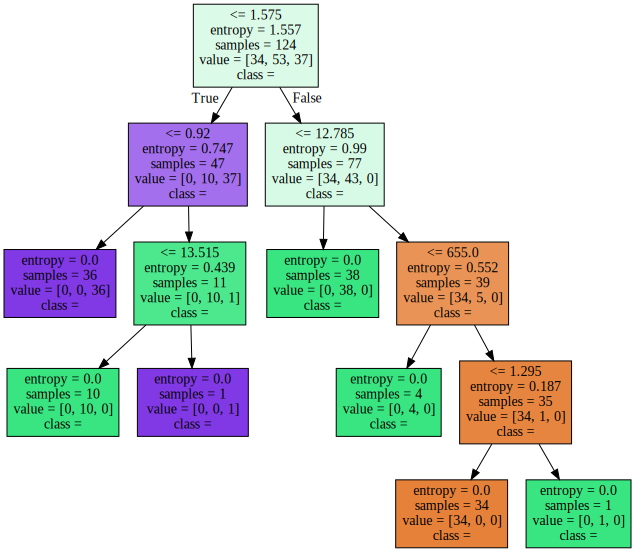

In [27]:
dot_data = tree.export_graphviz(clf
                     ,feature_names = feature_names #Xtrain 特征列
                     ,class_names = ["琴酒","雪莉","贝尔摩德"] #y标签
                     ,filled=True #渲染颜色
                    )
graph = graphviz.Source(dot_data,filename='决策树.pdf')
graph

In [30]:
graph.render('wine')

'wine.pdf'

### 探索决策树属性

#### clf.feature_importances_

In [32]:
#显示每个特征的重要程度
clf.feature_importances_

array([0.30840074, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.42318016, 0.        , 0.        , 0.        ,
       0.19072576, 0.        , 0.07769335])

In [33]:
[*zip(feature_names,clf.feature_importances_)]

[('酒精', 0.3084007387929411),
 ('苹果酸', 0.0),
 ('灰', 0.0),
 ('灰的碱性', 0.0),
 ('镁', 0.0),
 ('总酚', 0.0),
 ('类黄酮', 0.4231801558053247),
 ('非黄烷类酚类', 0.0),
 ('花青素', 0.0),
 ('颜色强度', 0.0),
 ('色调', 0.19072575820477977),
 ('od280/od315 稀释葡萄酒', 0.0),
 ('脯氨酸', 0.07769334719695445)]

#### clf.apply

In [35]:
clf.apply(Xtrain)

array([ 7,  5,  7,  7,  2, 11,  7,  2,  7,  7,  2, 11,  7,  7,  2,  2,  7,
       11,  2,  7,  2, 11,  4,  4,  2,  2, 11,  7,  2,  2,  7, 11, 11, 11,
       11,  2,  7, 11,  7, 11, 11,  2,  7, 11, 11,  9,  7, 11,  4,  7,  7,
        2,  2,  7, 11,  4, 11,  7, 11,  7,  2,  2, 11, 11, 11, 11,  7,  7,
       11,  2,  7,  2,  2,  7,  4,  2,  7,  4,  7,  2,  7, 11,  4,  2,  7,
       12,  7,  2,  4,  9, 11,  2,  7, 11, 11,  4, 11, 11,  4,  7,  2,  7,
        2,  7,  2,  9, 11, 11,  7,  2,  2, 11,  2,  2,  7,  2, 11,  2,  7,
       11,  7,  2,  9,  2], dtype=int64)

#### clf.tree_.node_count

In [36]:
clf.tree_.node_count #返回节点个数

13

#### clf.tree_.feature

In [37]:
 clf.tree_.feature  #对节点分类   -2是叶节点

array([ 6, 10, -2,  0, -2, -2,  0, -2, 12, -2, 10, -2, -2], dtype=int64)

## 防止过拟合与剪枝

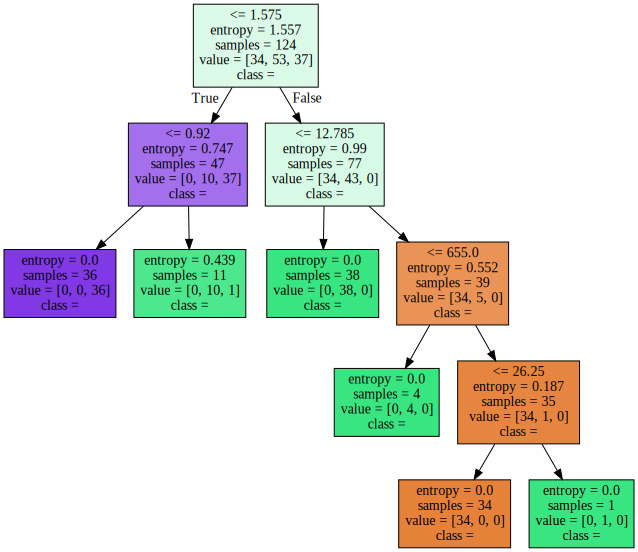

In [45]:
clf = tree.DecisionTreeClassifier(criterion='entropy'
                                 #,max_depth=3  #最大深度
                                 #,min_samples_leaf=5 #子节点包含样本最小个数（父节点）
                                  ,min_samples_split=20
                                 ) #生成决策树分类器   entropy

clf = clf.fit(Xtrain,Ytrain)


dot_data = tree.export_graphviz(clf
                     ,feature_names = feature_names #Xtrain 特征列
                     ,class_names = ["琴酒","雪莉","贝尔摩德"] #y标签
                     ,filled=True #渲染颜色
                    )
graph = graphviz.Source(dot_data)
graph

### 确定最优的剪枝参数（学习曲线）

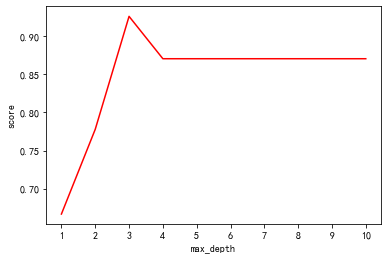

In [58]:
test= []

for i in range(10):
    clf = tree.DecisionTreeClassifier(criterion='entropy'
                                 ,max_depth=i+1  #最大深度
                                 #,min_samples_leaf=5 #子节点包含样本最小个数（父节点）
                                  #,min_samples_split=20
                                 ,random_state=30
                                 ,splitter='random'
                                 ) #生成决策树分类器   entropy

    clf = clf.fit(Xtrain,Ytrain)
    score = clf.score(Xtest,Ytest)
    test.append(score)

plt.plot(range(1,11),test,color='red')
plt.ylabel('score')
plt.xlabel('max_depth')
plt.xticks(range(1,11))
plt.show()

# 样本不平衡

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs #聚类产生数据集的方法

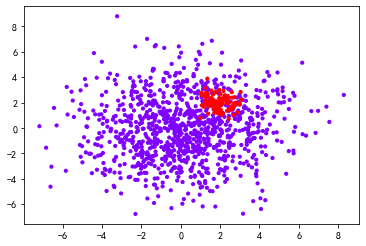

In [60]:
class_1 = 1000   #类别1 样本1000个 
class_2 = 100    #类别2 样本100个
centers = [[0,0],[2.0,2.0]] #两个类别的中心点
clusters_std = [2.5,0.5] #两个类别的方差 

X,y = make_blobs(n_samples=[class_1,class_2],
          centers=centers,
          cluster_std=clusters_std,
          random_state=420,shuffle=False)

plt.scatter(X[:,0],X[:,1],c=y,cmap='rainbow',s=10)

In [61]:
#划分数据集
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.2,random_state=420)


#不设定class_weight
clf_01 = DecisionTreeClassifier()

clf_01.fit(Xtrain,Ytrain)

DecisionTreeClassifier()

In [62]:
#设定class_weight
clf_02 = DecisionTreeClassifier(class_weight='balanced')

clf_02.fit(Xtrain,Ytrain)

DecisionTreeClassifier(class_weight='balanced')

In [63]:
clf_01.score(Xtest,Ytest)

0.8954545454545455

In [64]:
clf_02.score(Xtest,Ytest)

0.9045454545454545

## sk-learn 混淆矩阵库

In [65]:
from sklearn import metrics

### 混淆矩阵

In [66]:
#平衡前
metrics.confusion_matrix(Ytest,clf_01.predict(Xtest))


array([[183,   8],
       [ 15,  14]], dtype=int64)

In [67]:
#平衡后
metrics.confusion_matrix(Ytest,clf_02.predict(Xtest))

array([[182,   9],
       [ 12,  17]], dtype=int64)

### 精准率

In [68]:
metrics.precision_score(Ytest,clf_01.predict(Xtest))

0.6363636363636364

In [69]:
metrics.precision_score(Ytest,clf_02.predict(Xtest))

0.6538461538461539

### 召回率


In [70]:
metrics.recall_score(Ytest,clf_01.predict(Xtest))

0.4827586206896552

In [71]:
metrics.recall_score(Ytest,clf_02.predict(Xtest))

0.5862068965517241

### F值

In [72]:
metrics.f1_score(Ytest,clf_01.predict(Xtest))

0.5490196078431373

In [73]:
metrics.f1_score(Ytest,clf_02.predict(Xtest))

0.6181818181818182